In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizerFast

In [7]:
df=pd.read_csv('./dataset_tsv/train.tsv', sep='\t')
df.sample()

,PhraseId,SentenceId,Phrase,Sentiment
107504,107505,5680,radar screen,2


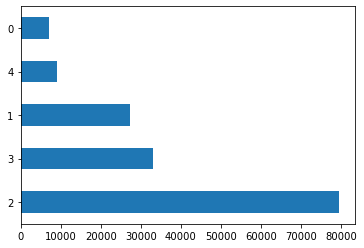

In [8]:
df['Sentiment'].value_counts().plot(kind='barh')
plt.show()

In [9]:
seq_length=512
batch_size=16

In [15]:
tokenizer=BertTokenizerFast.from_pretrained('bert-base-cased')

tokens=tokenizer(df['Phrase'].to_list(), max_length=seq_length,
                 truncation=True, padding='max_length', 
                 add_special_tokens=True, return_tensors='np')

In [39]:
with open('./npys/movies-xids.npy', 'wb') as f:
    np.save(f, tokens['input_ids'])

with open('./npys/movies-xmask.npy', 'wb') as f:
    np.save(f, tokens['attention_mask'])

In [40]:
labels = np.zeros((df.shape[0], df['Sentiment'].nunique()))
labels[np.arange(df.shape[0]), df['Sentiment']] = 1

In [41]:
with open('./npys/labels.npy', 'wb') as f:
    np.save(f, labels)